# Pyber Ride Sharing
----

### Analysis
* Less than 10% of total rides occur in rural areas. 
* Most rides occur in urban areas, over 60%. 
* The average fare amount is higher in rural areas than urban and suburban.

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"

# Read in the City and Ride CSV Data
city_csv = pd.read_csv(city_data_load)
ride_csv = pd.read_csv(ride_data_load)

# Combine the data
combined_city_ride = pd.merge(ride_csv, city_csv, how="left", on=["city", "city"])

# Display the data table for preview
combined_city_ride.head(10)

## Bubble Plot of Ride Sharing Data

In [3]:
#format x and y coordinates
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

rural= combined_city_ride[combined_city_ride["type"] == "Rural"]
suburban= combined_city_ride[combined_city_ride["type"] == "Suburban"]
urban = combined_city_ride[combined_city_ride["type"] == "Urban"]

rural_fare = rural.groupby(["city"]).mean()["fare"]
rural_driver = rural.groupby(["city"]).mean()["driver_count"]
rural_ride = rural.groupby(["city"]).count()["ride_id"]

suburban_fare = suburban.groupby(["city"]).mean()["fare"]
suburban_driver = suburban.groupby(["city"]).mean()["driver_count"]
suburban_ride = suburban.groupby(["city"]).count()["ride_id"]

urban_fare = urban.groupby(["city"]).mean()["fare"]
urban_driver = urban.groupby(["city"]).mean()["driver_count"]
urban_ride = urban.groupby(["city"]).count()["ride_id"]

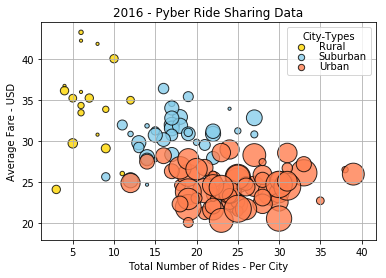

In [18]:
# scatter plots
plt.scatter(rural_ride, 
            rural_fare, 
            s=10*rural_driver, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

plt.scatter(suburban_ride, 
            suburban_fare, 
            s=10*suburban_driver, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(urban_ride, 
            urban_fare, 
            s=10*urban_driver, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

# legend
legend = plt.legend(fontsize="medium", mode="tight", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="City-Types", 
                  labelspacing=0)
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = []


# Incorporate the other graph properties
plt.title("2016 - Pyber Ride Sharing Data")
plt.ylabel("Average Fare - USD")
plt.xlabel("Total Number of Rides - Per City")
plt.grid(True)

# Save Figure
plt.savefig("analysis/scatterplot.png")

plt.show()

## Total Rides by City Type

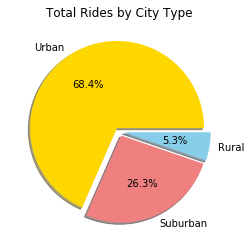

In [47]:
# Ride Percent
ride_percent = 100 * combined_city_ride.groupby(["type"]).count()["ride_id"] / combined_city_ride["ride_id"].count()

# ie Chart
plt.pie(ride_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["skyblue", "lightcoral", "gold"],
        explode=[0.05, 0.05, 0.05], 
        autopct='%1.1f%%', 
        counterclock=False, shadow=True)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("analysis/totalrides_citytype.png")

# Show Figure
plt.show()

## Total Fares by City Type

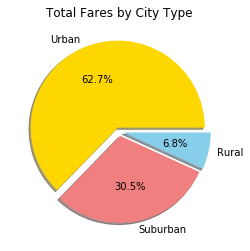

In [48]:
# City Percent
type_percent = 100 * combined_city_ride.groupby(["type"]).sum()["fare"] / combined_city_ride["fare"].sum()

# Build Pie Chart
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["skyblue", "lightcoral", "gold"],
        explode=[0.05, 0.05, 0.05], 
        autopct='%1.1f%%', 
        counterclock=False, shadow=True)

plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("analysis/totalfares_citytype.png")

# Show Figure
plt.show()

## Total Drivers by City Type

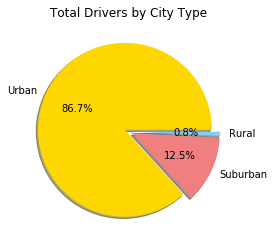

In [50]:
# Calculate Driver Percents
driver_percent = 100 * combined_city_ride.groupby(["type"]).sum()["driver_count"] / combined_city_ride["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["skyblue", "lightcoral", "gold"],
        explode=[0.05, 0.05, 0.05], 
        autopct='%1.1f%%', 
        counterclock=False, shadow=True)
plt.title("Total Drivers by City Type")

# Save Figure
plt.savefig("analysis/totaldrivers_citytype.png")

# Show Figure
plt.show()